# PIC 16A FINAL PROJECT

## Group 15: Belle Ho, Ivy Tang, Katelyn Timmons

### Professor Murray, Winter 2022

# Group Contributions Statement

* Katelyn: Import/Clean data and headings. Exploratory analysis box plot figure and descriptions for the tables. Gradient model and description. 
* Ivy: Exploratory analysis bar chart, confusion matrices, decision regions, Random Forest model and description
* Belle: Exploratory data analysis scatter plots and description, heatmap for feature selection and description, Logistic Regression model


# Exploratory Analysis 
We begin our modeling process by importing, splitting, and cleaning the data from the Palmer Penguins dataset. 

# Import Data
First, we want to import the data and show the first few rows to get a sense of the data frame that we will be working with. 

In [ ]:
# modules we use to import the data
import numpy as np 
import pandas as pd 
import urllib 

#read in penguins data set
url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)

In [ ]:
# show the first 5 rows of data
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


# Split the Data into Training and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split

# use the random seed "12345" to ensure replicability
np.random.seed(12345)

train, test = train_test_split(penguins, test_size = 0.2)

# Cleaning the Data
Since we have already split the data into training and test sets, we can now clean it. 

In [ ]:
from sklearn import preprocessing 

def clean_penguins_data(df_input): 
    """
    This function cleans the penguin data frame. It does so by removing unwanted columns 
    and rows. It adds another column where categorical data is converted into numerical data. 
    
    Parameters:
        df_input: dataframe
    
    Outputs: 
        cleaned dataframe
    """
    
    df = df_input.copy()
    # keep only descriptive columns
    df = df[['Species', 'Region', 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)',
             'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 
             'Delta 13 C (o/oo)']]
    
    # drop rows with na values
    df = df.dropna()
    
    # drop rows that have "." in the sex column of the Penguins dataframe
    df = df.drop(df[df['Sex'] == '.'].index)
    
    # shorten the species name
    df["Species"] = df["Species"].str.split().str.get(0)

    #create new columns for categorical variables to be converted into numerical variables
    le = preprocessing.LabelEncoder()
    df['islandLabels'] = le.fit_transform(df['Island'])
    df['speciesLabels'] = le.fit_transform(df['Species'])
    df['Sex'] = le.fit_transform(df['Sex'])
    
    return df

In [ ]:
# clean the pre-split test and train data
trainCleanData = clean_penguins_data(train)
testCleanData = clean_penguins_data(test)
#Clean whole data set fro exploratory data analysis
cleanData = clean_penguins_data(penguins)

# Exploratory Analysis and Data Visualization

In this section, we move on to exploratory analysis. Exploratory analysis helps us make preliminary decisions about what features to model, in the form of tables and graphs to visualize key data points. We do this to make sure we are focusing on meaningful and effective grouping variables to ultimately make significant predictions. We intend to choose **two quantitative predictors, and one qualitative predictor**. By using both quantitative and qualitative data, we are improving the model's chances of capturing variability. 


#### Table 1: Number of Species per Island

In [ ]:
trainCleanData.groupby(['Island', 'Species']).count()

Region  Culmen Length (mm)  Culmen Depth (mm)  \
Island    Species                                                    
Biscoe    Adelie         34                  34                 34   
          Gentoo         94                  94                 94   
Dream     Adelie         42                  42                 42   
          Chinstrap      53                  53                 53   
Torgersen Adelie         38                  38                 38   

                     Flipper Length (mm)  Body Mass (g)  Sex  \
Island    Species                                              
Biscoe    Adelie                      34             34   34   
          Gentoo                      94             94   94   
Dream     Adelie                      42             42   42   
          Chinstrap                   53             53   53   
Torgersen Adelie                      38             38   38   

                     Delta 15 N (o/oo)  Delta 13 C (o/oo)  islandLabels  \
Island    Species                                                         
Biscoe    Adelie                    34                 34            34   
          Gentoo                    94                 94            94   
Dream     Adelie                    42                 42            42   
          Chinstrap                 53                 53            53   
Torgersen Adelie                    38                 38            38   

                     speciesLabels  
Island    Species                   
Biscoe    Adelie                34  
          Gentoo                94  
Dream     Adelie                42  
          Chinstrap             53  
Torgersen Adelie                38

Table 1 gives us an idea of how many penguins of each species live on each island. On the Biscoe island, only Adelie and Gentoo penguin species reside there. On the Dream island, there are only Adelie and Chinstrap penguins. On the Torgersen island, only Adelie penguins live there. Adelie penguins can be found on all three islands, where Gentoo penguins can only be found on the Biscoe island, and Chinstrap penguins can only be found on the Dream island. This gives us a preliminary idea that Island might be a good qualitative variable to choose, as it differentiates between the species well. 

#### Table 2: Summary Statistics (mean) by Island, Species & Sex

In [ ]:
trainCleanData.groupby(['Island', 'Species', 'Sex']).mean()

Culmen Length (mm)  Culmen Depth (mm)  \
Island    Species   Sex                                          
Biscoe    Adelie    0             36.986667          17.573333   
                    1             40.673684          18.957895   
          Gentoo    0             45.623810          14.292857   
                    1             49.584615          15.736538   
Dream     Adelie    0             36.945455          17.427273   
                    1             40.200000          18.690000   
          Chinstrap 0             47.104000          17.648000   
                    1             50.925000          19.235714   
Torgersen Adelie    0             37.621053          17.521053   
                    1             40.210526          19.247368   

                         Flipper Length (mm)  Body Mass (g)  \
Island    Species   Sex                                       
Biscoe    Adelie    0             186.666667    3321.666667   
                    1             189.736842    4022.368421   
          Gentoo    0             213.071429    4697.023810   
                    1             221.461538    5487.980769   
Dream     Adelie    0             188.045455    3336.363636   
                    1             193.000000    4070.000000   
          Chinstrap 0             192.160000    3519.000000   
                    1             199.750000    3935.714286   
Torgersen Adelie    0             188.842105    3415.789474   
                    1             195.789474    4047.368421   

                         Delta 15 N (o/oo)  Delta 13 C (o/oo)  islandLabels  \
Island    Species   Sex                                                       
Biscoe    Adelie    0             8.835342         -25.984470           0.0   
                    1             8.858986         -25.885664           0.0   
          Gentoo    0             8.224772         -26.263013           0.0   
                    1             8.276664         -26.183952           0.0   
Dream     Adelie    0             8.841030         -25.849533           1.0   
                    1             8.955424         -25.785054           1.0   
          Chinstrap 0             9.316752         -24.552901           1.0   
                    1             9.473145         -24.547353           1.0   
Torgersen Adelie    0             8.665729         -25.755853           2.0   
                    1             8.948187         -25.858433           2.0   

                         speciesLabels  
Island    Species   Sex                 
Biscoe    Adelie    0              0.0  
                    1              0.0  
          Gentoo    0              2.0  
                    1              2.0  
Dream     Adelie    0              0.0  
                    1              0.0  
          Chinstrap 0              1.0  
                    1              1.0  
Torgersen Adelie    0              0.0  
                    1              0.0

Table 2 shows the mean of each quantitative feature of the penguins data set, and displays it divided by island, species, and sex. Sex in this table is displayed as 0 = Female and 1 = Male. We can see from the table that Chinstrap penguins on the Dream island and Gentoo penguins on the Biscoe island have higher mean culmen lengths than their island co-habitants. Gentoo penguins seem to have much higher body mass and flipper length than both the Chinstrap and Adelie species. Culmen length, culmen depth, body mass, and flipper length all stand out in this table. It might be worth paying attention to these quantitative features in our feature selection process.

#### Figure 1: Culmen Length (mm) versus Culmen Depth (mm) by Species

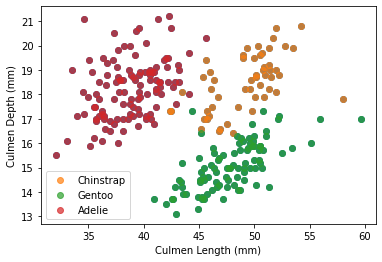

In [ ]:
#This is a scatter plot that plots culmen depths against culmen lengths by species
import numpy as np 
from matplotlib import pyplot as plt 

fig, ax = plt.subplots(1) 
ax.set(xlabel = "Culmen Length (mm)", 
       ylabel = "Culmen Depth (mm)") 
ax.scatter(trainCleanData['Culmen Length (mm)'], trainCleanData['Culmen Depth (mm)']) 
species = set(trainCleanData['Species']) 
 
for s in species: 
        label = s.split()[0] 
        training_subspecies = trainCleanData[trainCleanData['Species'] == s] 
        ax.scatter(training_subspecies['Culmen Length (mm)'], training_subspecies['Culmen Depth (mm)'],
                   label = label, alpha = 0.7)

ax.legend() 
plt.show()

In Figure 1, the yellow , green, and red data points represent Adelie, Chinstrap, and Gentoo penguins, respectively. As illustrated by Figure 1, Adelie penguins appear to have a significantly shorter mean culmen length than Chinstrap and Gentoo penguins. Gentoo penguins appear to have a significantly shallower culmen depths than the other two species. Chistrap penguins are clustered around the top right region of the plot, suggesting that they have both deep culmen depths and long culmen lengths. Figure 1 provides us with the intuition that culmen depths and culmen lengths are  suitable features to use in later machine learning models as we can visualise how the three different penguin species have disinctly different culmen lengths and depths. 

#### Figure 3: Number of Species by Island

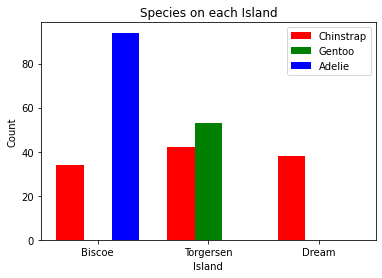

In [ ]:
#barchart -> species by island
import numpy as np 
from matplotlib import pyplot as plt 
fig, ax = plt.subplots(1)
ax.set(xlabel = "Island",
       ylabel = "Count",
       title = "Species on each Island")

N = 3
ind = np.arange(N) 
width = 0.25

islands = list(set(trainCleanData['Island']))
species = list(set(trainCleanData['Species']))

pop = trainCleanData.groupby("Island")["Species"].value_counts()
pop_dict = dict(pop)

for i in islands:
  for s in species:
    pop_dict.setdefault((i, s), 0) #if no species on the island, set count to 0

pop_list = sorted(pop_dict.items())

#number of species on each island
num_Adelie = [t[1] for t in pop_list if t[0][1] == "Adelie"]
bar1 = plt.bar(ind, num_Adelie, width, color = 'r')
  
num_Chinstrap = [t[1] for t in pop_list if t[0][1] == "Chinstrap"]
bar2 = plt.bar(ind+width, num_Chinstrap, width, color = 'g')
  
num_Gentoo = [t[1] for t in pop_list if t[0][1] == "Gentoo"]
bar3 = plt.bar(ind+width*2, num_Gentoo, width, color = 'b')
  
plt.xticks(ind+width, islands)
plt.legend((bar1, bar2, bar3), species)
plt.show()

#plot for each island, species vs. a qualitative variable

Figure 3 shows the number of species on each Island. From this figure, we can see that only Adelie penguins reside on the Biscoe island, but are found on both Dream and Torgersen islands as well. Chinstrap penguins can only be found on the Dream island, and Gentoo penguins can only be found on the Torgersen island. 

#### Figure 4: Flipper Length (mm) and Body Mass (g) by Species 

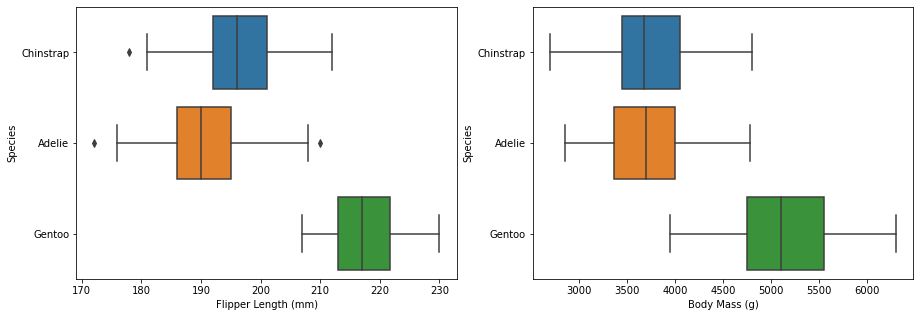

In [ ]:
import seaborn as sns
# this is a box plot that compares flipper length in mm by species

fig, ax = plt.subplots(1,2,figsize = (15,5))

#plot box plot and set parameters
sns.boxplot(x="Flipper Length (mm)", y="Species", ax=ax[0], data = trainCleanData)
sns.boxplot(x="Body Mass (g)", y = "Species", ax=ax[1], data = trainCleanData)
plt.show()

Figure 4 shows the average flipper length and body mass per species. From the figure, we can tell that Gentoo penguins typically have a significantly longer flipper length and body mass than Adelie or Chinstrap penguins. 

# Feature Selection
Our approach to feature selection utlises out Exploratory Data Analysis along with exploring the correlation between the different characteristics and the different species with a heatmap. 

#### Figure 5 correlation heat map to show the correlation between variables and species

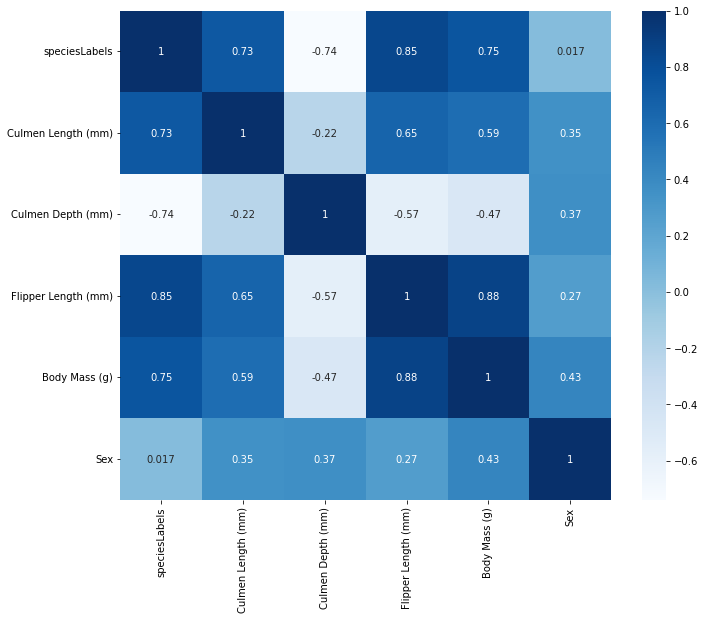

------ The best features ------
speciesLabels          1.000000
Culmen Length (mm)     0.728453
Culmen Depth (mm)      0.739252
Flipper Length (mm)    0.847541
Body Mass (g)          0.750677
Name: speciesLabels, dtype: float64


In [ ]:
# correlation heat map
cleanData2 = cleanData[['speciesLabels','Island', 'Culmen Length (mm)', 'Culmen Depth (mm)', 
                     'Flipper Length (mm)', 'Body Mass (g)', 'Sex']]
import seaborn as sns
plt.figure(figsize=(11,9))
cor = cleanData2.corr()
sns.heatmap(cor, annot=True, cmap="Blues")
plt.show()

#Showing best features - features with correlation higher than 0.5
cor_target = abs(cor["speciesLabels"])

#Selecting highly correlated features
relevant_features = cor_target[abs(cor_target>0.5)]

print("------ The best features ------")
print(relevant_features)

Figure 5 is a heatmap that allows us to visualise the correlation of the characteristics between one and another. The axis variables (characteristics of penguins in this case) are divided into ranges like a bar chart or histogram, and each cell’s color indicates the correlation of the x variable and the y variable in the corresponding cell range. The strength of correlation is indicated by how dark the color is and the correlation coefficient. The Y and X axis are the list of features. It is useful to look at which featrues are the most correlated to species. Features that are the most correlated to species would be selected to use in the machine learning models in the later part of this project. However, it is clear that not all features are useful as some have little to no correlation with Species. Using relevant features, we are able to highlight features that have a correlation coefficient that is higher than 0.5.

# Models
  Following feature selection, we will now train three different models: Random Forest, Logistic Regression, and Gradient Boosting. 

  In order to avoid overfitting our models, we use cross validation. Overfitting refers to when a machine learning algorithm performs well for training data but poorly on test data. Cross-validation can give a better estimate as to how accurately a model will perform, as it uses different samples of data as opposed to just a single subset of data. We can also use cross-validation to determine the optimal depth, which we can later on use to evaluate a model against unseen test data. 

  Each model is accompanied by a confusion matrix, which visualizes a model's predictions of species against the true species in order to compare their performance against other models. The diagonal values indicate the number of times the model made a correct prediction, and the other values represent instances when the predicted species was wrong.

  We also made decision regions to evaluate each classifier and visualize how the classifier makes decisions. Decision regions refer to the space that the classifier gives for each label, and this can vary across different models despite having the same input data. 

In [ ]:
import matplotlib.patches as mpatches
def plot_regions(c, X, y):
    '''
    plots decision regions for each island
    
    Parameter
      c: model classifier
      X: predictor variables
      y: target variable
      
    Outputs decision region plots
    '''
    
    Island_mapping = {'Biscoe': 0, 'Dream': 1, 'Torgersen': 2}
    # create the plot
    fig, ax = plt.subplots(1,3, figsize = (15, 5))
    names = list(Island_mapping.keys())
    # plot each island
    for i in Island_mapping.values():
        index = X['islandLabels']==i
        x0 = X['Culmen Length (mm)'][index]
        x1 = X['Culmen Depth (mm)'][index]
        y_temp = y[index]
        
        # y = y[X["islandLabels"] == i]
        # x1 = X[X.columns[2]][c]
    
        # create a grid
        grid_x = np.linspace(x0.min(),x0.max(),501)
        grid_y = np.linspace(x1.min(),x1.max(),501)
        xx, yy = np.meshgrid(grid_x, grid_y)
    
        # extract model predictions, using the 
        # np.c_ attribute to join together the 
        # two parts of the grid. 
        # array.ravel() converts an multidimensional
        # array into a 1d array, and we use array.reshape()
        # to turn the resulting predictions p 
        # back into 2d
    
        XX = xx.ravel()
        YY = yy.ravel()
        ZZ = i*np.ones(XX.shape)
        XY = np.c_[ZZ, XX, YY]
    
        p = c.predict(XY)
        p = p.reshape(xx.shape)

    
        # use contour plot to visualize the predictions
        ax[i].contourf(xx, yy, p, cmap = "jet", alpha = 0.2,vmin = 0, vmax = 2)
        
        # plot the data
        ax[i].scatter(x0, x1, c=y_temp, cmap = "jet", vmin = 0, vmax = 2)
        #scatter = ax.scatter(x0, x1, c=y, cmap = "jet", vmin = 0, vmax = 2)
        #, c = y
        
        ax[i].set(xlabel = "Culmen Length (mm)",
               ylabel = "Culmen Depth (mm)",
               title = names[i])
        
        #add legend with colors from the scatterplot
        red = mpatches.Patch(color='red', label='Gentoo')
        blue = mpatches.Patch(color='blue', label='Adelie')
        green = mpatches.Patch(color='lime', label='Chinstrap')
        
        ax[i].legend(loc = 4, handles=[blue,green, red], title="Species")

## Random Forest Model [Model 1]
The Random Forest Model takes different random samples of the data, makes decision trees out of each of these samples, and takes a majority vote of the decisions out of all the decision trees. 

In [ ]:
#training data for Random Forest
X_train_RF = trainCleanData[['islandLabels', 'Culmen Length (mm)', 'Culmen Depth (mm)']]
y_train_RF = trainCleanData['speciesLabels']

#testing data for Random Forest
X_test_RF = testCleanData[['islandLabels', 'Culmen Length (mm)', 'Culmen Depth (mm)']]
y_test_RF = testCleanData['speciesLabels']

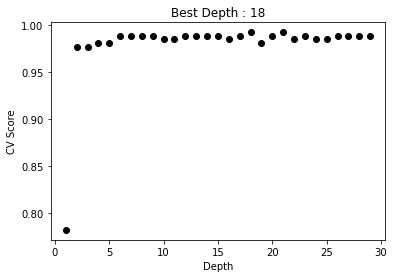

In [ ]:
#RANDOM FOREST: https://www.datacamp.com/tutorial/random-forests-classifier-python
from sklearn.ensemble import RandomForestClassifier

#cross validation
from sklearn.model_selection import cross_val_score
fig, ax = plt.subplots(1)

best_score = 0

#find best depth and best cross validation score
for d in range(1,30):  
    R = RandomForestClassifier(max_depth = d)
    cv_score = cross_val_score(R, X_train_RF, y_train_RF, cv=10).mean()
    ax.scatter(d, cv_score, color = "black") 
    if cv_score > best_score:   
        best_depth = d
        best_score = cv_score

l = ax.set(title = "Best Depth : " + str(best_depth),
       xlabel = "Depth", 
       ylabel = "CV Score")

After iterating through different depths, it appears that the best depth for the Random Forest model is 18. We will use this as an input to our classifier, which will be used to test how accurate our model is.

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(max_depth = best_depth, n_estimators=100)

#train the model using the training data
clf.fit(X_train_RF, y_train_RF)

#make predictions for the test data
y_pred_RF = clf.predict(X_test_RF)

# Model Accuracy, how often is the classifier correct on the training data?
print("Accuracy on training data: ", np.round(clf.score(X_train_RF, y_train_RF),3))

Accuracy on training data:  1.0


#### Cross Validation

In [ ]:
mean_cv_RF = np.round(cross_val_score(clf, X_train_RF, y_train_RF, cv = 5).mean(), 3)
print("Mean cross validation: ", mean_cv_RF)

Mean cross validation:  0.981


In [ ]:
print("Accuracy on test data: ", np.round(clf.score(X_test_RF, y_test_RF), 3))

Accuracy on test data:  0.952


The model appears to be performing pretty well, with a mean cross validation score of 0.988 on training data and an accuracy score of 0.952 on test data.

#### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix(y_test_RF, y_pred_RF)

array([[23,  2,  0],
       [ 1, 13,  0],
       [ 0,  0, 24]])

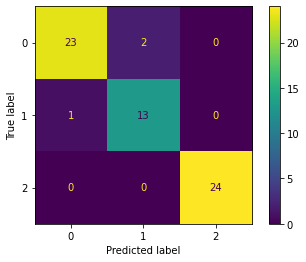

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_RF, y_pred_RF)
plt.show()

The numbers on the diagonal boxes indicate that the model makes pretty accurate predictions. However, the other cells show that the model inaccurately predicts Chinstrap penguin when it's actually an Adelie penguin twice, and also inaccurately predicts an Adelie penguin to be a Chinstrap penguin once.

#### Decision Regions

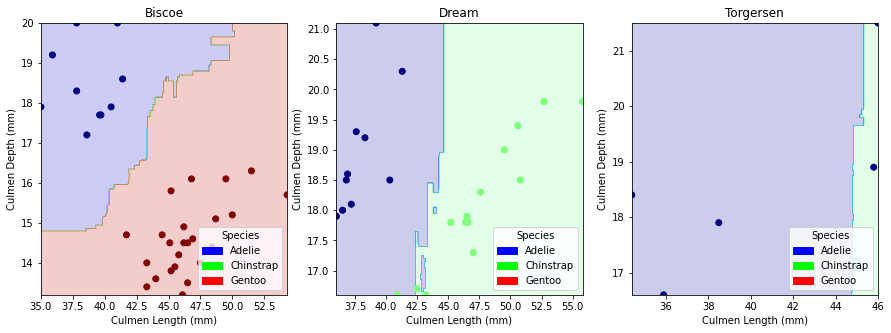

In [ ]:
from sklearn.ensemble import RandomForestClassifier
plot_regions(clf, X_test_RF, y_test_RF)

The Random Forest Model utilizes the technique "bagging," which reduces variance by constructing different decision trees in order to get the optimal decision. Since this model uses multiple decision trees, overfitting isn't as likely. 

While the Random Forest Model slightly overfitted by performing perfectly on the training data, and scoring slightly worse on the test data (0.952), it still performed well overall. The errors this model made may have been due to species (that are on the same island) having closer culmen length and culmen depth. 


## Logistical Regression Model [Model 2]
The type of logistical regression model we are using is multinomial(MLR), which allows us to predict three or more different class with no natural ordering, like the three species of penguins that we have.  The MLR uses maximum likelihood estimation to evaluate the probability of categorical membership.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X_train_lR = trainCleanData[['islandLabels','Culmen Length (mm)', 'Culmen Depth (mm)']]
y_train_lR = trainCleanData['speciesLabels']

X_test_lR = testCleanData[['islandLabels','Culmen Length (mm)', 'Culmen Depth (mm)']]
y_test_lR = testCleanData['speciesLabels']

#### Best Complexity

Best CV: 0.973


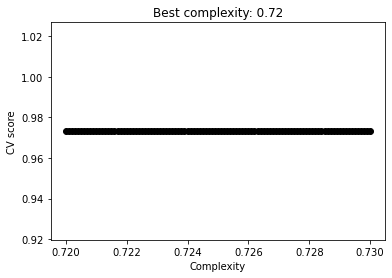

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1)
    # features = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island']
best_cv = 0
best_complex = 0
    
for d in np.arange(0.72,0.73,0.0001):
    T = LogisticRegression(multi_class = 'multinomial', C = d, solver = 'lbfgs', max_iter = 1000)
            
    mean_cv = cross_val_score(T, X_train_lR, y_train_lR, cv = 10).mean()
        
    if mean_cv > best_cv:
        best_cv = mean_cv
        best_complex = d
            
    ax.scatter(d, mean_cv, color = "black")
    
    ax.set(title = "Best complexity: "+ str(round(best_complex, 3)), 
           xlabel = "Complexity", ylabel = "CV score")
    
print('Best CV:', np.round(best_cv, 3))

In [ ]:
lR = LogisticRegression(C = best_complex, max_iter = len(penguins))

lR.fit(X_train_lR,y_train_lR)

y_pred_lR = lR.predict(X_test_lR)

print("Accuracy on training data: ", np.round(lR.score(X_train_lR, y_train_lR), 3))

Accuracy on training data:  0.985


In [ ]:
mean_cv_lR = np.round(cross_val_score(lR, X_train_lR, y_train_lR, cv = 5).mean(), 3)
print("Mean cross validation: ", mean_cv_lR)

Mean cross validation:  0.973


In [ ]:
print('Accuracy on test data: {:.2f}'.format(lR.score(X_test_lR, y_test_lR)))

Accuracy on test data: 0.95


#### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

confusion_matrix(y_test_lR, y_pred_lR)

array([[24,  1,  0],
       [ 2, 12,  0],
       [ 0,  0, 24]])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test_lR, y_pred_lR)
plt.show()

The Logistical regression model has a relatively high accuracy. Recall that 0, 1, and 2 represent Adelie, Chinstrap, and Gentoo penguins respectively. The LR model was able to accurately identify 24 Adelie, 13 Chinstrap, and 24 Gentoo penguins. However, it had mistaken 1 Adelie penguin as a Chinstrap penguin and 2 Chinstrap penguins as Adelie penguins. 

Using the previously defined plot_regions function, we plot the decision regions for our logistic regression model. We hope to visualize how well our model performs on a large set of penguins and how the model makes decisions to classify the species.

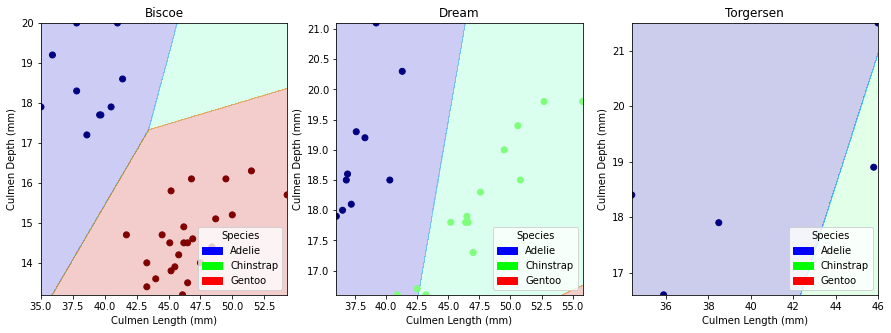

In [ ]:
#decision region
plot_regions(lR, X_test_lR,  y_test_lR)

## Explanation of the Multinomial regression model (MLR) 
The type of logistical regression model we are using is multinomial(MLR), which allows us to predict three or more different class with no natural ordering, like the three species of penguins that we have.  The MLR uses maximum likelihood estimation to evaluate the probability of categorical membership.

**Finding the best complexity (best parameters) for the MLR model**

We first used a for loop to find the best complexity for the MLR model. We check which one is the best complexity by checking the best cross validation score.  We found that the best complexity is 0.72. 

**Cross validation**

While finding the best complexity, I have also calculated the cross validation scores of the model. With 0.72, the model has the cross validation score of 0.973.

**Using the best parameters to train the data**

Now that we have found the best parameter, we put these parameters into the model to train the data set. The accuracy on the training data set is 0.985, and the accuracy on the test data is 0.95. The model has performed decently well. 

**Confusion matrix and decision regions** 
From the decision regions graph we can see that this model has linear decision boundaries. This model does not perform perectly and does have some mistakes as shown from the decision regions and the confusion matrix. The model confused adelie penguins with chinstrap peguins. As we can see, on dream island, there are two Chinstrap penguins with relatively long Culmen depth but short Culmen length. This confuses the model as it is hard to differentiate between Adelie and Chinstrap when they have similar Culmen length and depth. On Torgersen Island, the model misclassfieid an Adelie penguin as a chinstrap penguin

## Gradient Boosting Model [Model 3]

Known for its prediction speed and accuracy, the Gradient boosting model sequentially builds weak prediction models and uses the errors from these models to create a stronger, more accurate predictor. This model is based on the idea that the next best model, combined with past models, can minimize the prediction error.  

In [ ]:
# capture predictor and target variables needed for training
X_train_GB = trainCleanData[['islandLabels', 'Culmen Length (mm)', 'Culmen Depth (mm)']]
y_train_GB = trainCleanData['speciesLabels']

# capture predictor and target variables needed for testing
X_test_GB = testCleanData[['islandLabels', 'Culmen Length (mm)', 'Culmen Depth (mm)']]
y_test_GB = testCleanData['speciesLabels']

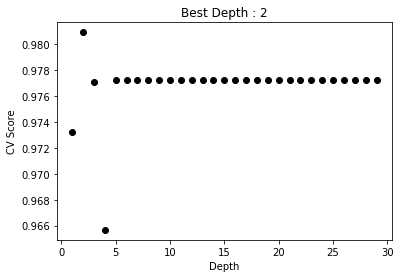

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

fig, ax = plt.subplots(1)

best_score_gB = 0

for d in range(1,30):  
    gB = GradientBoostingClassifier(max_depth = d)
    cv_score_gB = cross_val_score(gB, X_train_GB, y_train_GB, cv=10).mean()
    # plot each point
    ax.scatter(d, cv_score_gB, color = "black") 
    # update best scores
    if cv_score_gB > best_score_gB:   
        best_depth_gB = d
        best_score_gB = cv_score_gB

# set axis labels and titles        
l = ax.set(title = "Best Depth : " + str(best_depth_gB),
       xlabel = "Depth", 
       ylabel = "CV Score")

In [ ]:
gB = GradientBoostingClassifier(max_depth = best_depth_gB, n_estimators = 1000)

# fit the model to training data
gB.fit(X_train_GB,y_train_GB)

# generate predictions
y_pred_GB = gB.predict(X_test_GB)

print("Accuracy on training data: ", np.round(gB.score(X_train_GB, y_train_GB), 3))

Accuracy on training data:  1.0


From the 1.0 value we get of the accuracy of training data, it seems that the model may be slightly overfit. Let's look first at our cross validation and testing scores to see if they are close, or indicate that the model needs to be fixed. 

#### Cross Validation

In [ ]:
mean_cv_GB = np.round(cross_val_score(gB, X_train_GB, y_train_GB, cv = 5).mean(), 3)
print("Cross Validation Score: ", np.round((mean_cv_GB),3))

Cross Validation Score:  0.977


Given the cross validation score of 0.977, we are cautiously optimistic that the model may just be predicting the data of the training set really well. Let's look at the testing accuracy. 

In [ ]:
print("Accuracy on test data: ", np.round(gB.score(X_test_GB, y_test_GB), 3))

Accuracy on test data:  0.968


To our relief, the testing accuracy is also high, coming in at about 0.968. This means that while our model might be slightly overfit, it is predicting penguin species at very high levels, and is doing a good job. 

#### Confusion Matrix

In [ ]:
# CONFUSION MATRIX code here
confusion_matrix(y_test_GB, y_pred_GB)

array([[24,  1,  0],
       [ 1, 13,  0],
       [ 0,  0, 24]])

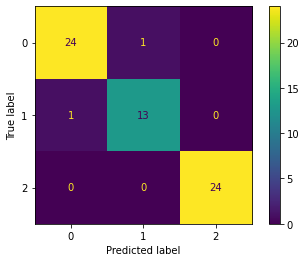

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_GB, y_pred_GB)
plt.show()

The Gradient Boosting Model does a pretty good job of predicting penguin species, making only two mistakes overall. It first incorrectly classifies a Adelie penguin as a Chinstrap penguin. Then, it incorrectly classifies a Chinstrap penguin as an Adelie penguin. 

#### Decision Regions

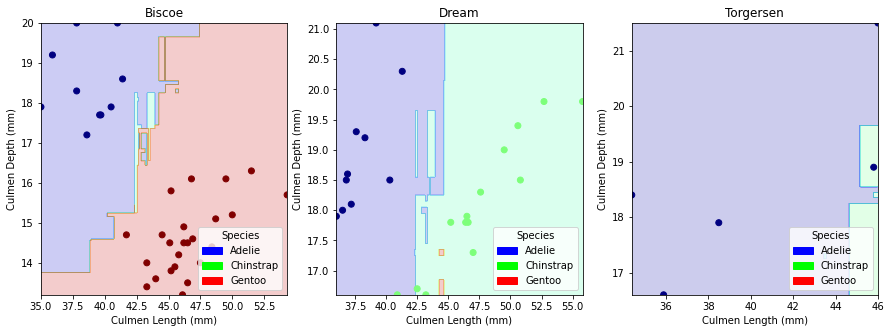

In [ ]:
# DECISION REGIONS code here
plot_regions(gB, X_test_GB, y_test_GB)

As shown through the testing, cross validation, confusion matrices, and decision regions, the Gradient Boosting Model does quite well, only making two mistakes. This speaks to how strong Culmen Length, Culmen Depth, and Island are as features that provide easy distinction between the species. 

One way this model may have performed better is from a larger training set. The Gradient Boosting model, as stated above, uses errors from past trials to build a stronger model. With more data to gain insight from, the model may have performed better. 

# Final Model

The overall performance of each of the three models above is very similar. They all perform very well, only making a few mistakes each. They have similar testing accuracy, training accuracy, and decision region plots. 

We stand by the features that we chose (Culmen Length (mm), Culmen Depth (mm), and Island) as these proved to be very strong features in terms of making predictions across each model. 

An interesting thing to point out is that the Random Forest Model and the Gradient Boosting Model both fell victim to slight overfitting on the training data, yet had very high cross validation and testing scores. This is likely because the Random Forest Model and the Gradient Boosting Model follow much of the same logic when evaluating data and making predictions. While the Gradient Boosting Model made fewer mistakes than the Random Forest Model, one drawback is that it takes significantly longer to run. 

Our models definitely would have improved if there was more data to train the models with. Since the Random Forest Model and the Gradient Boosting Model both rely on training data to fine tune their predictions and learn from errors, potentially the 2 penguins that were misclassified in the Gradient Boosting Model, and the 3 penguins from the Random Forest Model could have been avoided. It seems that the model struggles with classifying species that reside with Adelie penguins, as Adelie penguins can be found on any island and seem to dominate. If we had more, or different data points of the penguins that reside on the other islands with the Adelie penguins, possibly we would be able to avoid misclassification. 

One weakness is that our features were chosen from correlations on a heat map. Perhaps if we had written a function that grouped three features together and tested different combinations, we would have found features that are more predictive than the three that we chose. However, it would only be a slight difference, given how accurate our three models are. 

After evaluating each model, we choose to go with the Gradient Boosting model because it yields the highest accuracy score of 0.968.